# **Лабораторная работа 3: Использование механизмов внимания в нейронных сетях**

Выполнил(а) студент **2** курса группы: **ББМО-02-23**

ФИО: **Дурягин Михаил Романович**

##**1. Утановим нужные библиотеки и утилиту TF-KERAS-VIS — набор инструментов визуализации для отладки `tf.keras.Model`:**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import tensorflow as tf
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16 as Model

In [ ]:
!pip install tf-keras-vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.1 MB/s eta 0:00:00


## **2. Загрузим выбранные нами изображения:**

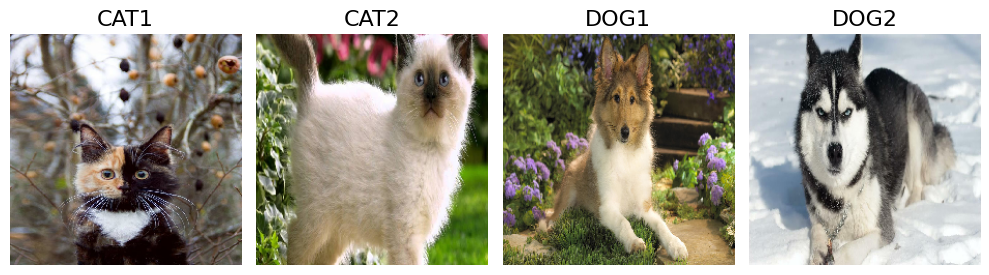

In [ ]:
# Загружаем предобученную модель VGG16 с весами ImageNet:
model = Model(weights='imagenet', include_top=True)
# Создадим списки изображений и путей к ним для загрузки:
imgTitleList = ['CAT1', 'CAT2', 'DOG1', 'DOG2']
imgPathList = ['CAT1.jpg', 'CAT2.jpg', 'DOG1.jpg', 'DOG2.jpg']
# Загружаем изображения:
imgArr = np.asarray([np.array(load_img(imgPath, target_size=(224, 224))) for imgPath in imgPathList])
# Предобрабатываем изображения для подачи в модель (нормализация и изменение формата):
X = preprocess_input(imgArr)
# Визуализируем изображений:
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
for i, title in enumerate(imgTitleList):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(imgArr[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

## **3. Изменим функцию активации последнего слоя на линейную, зададим метки классов выбранным изображениям:**

In [ ]:
# Меняем активацию последнего слоя модели на линейную:
replace2linear = ReplaceToLinear()
def model_modifier_function(cloned_model):
    cloned_model.layers[-1].activation = tf.keras.activations.linear
# Определяем функцию для получения оценок по выходным данным модели:
score = CategoricalScore([283, 284, 235, 248])
def score_function(output):
    return (output[0][283], output[1][284], output[2][235], output[3][248])

## **4. Отобразим карту значимости Cайленси различных областей изображения:**

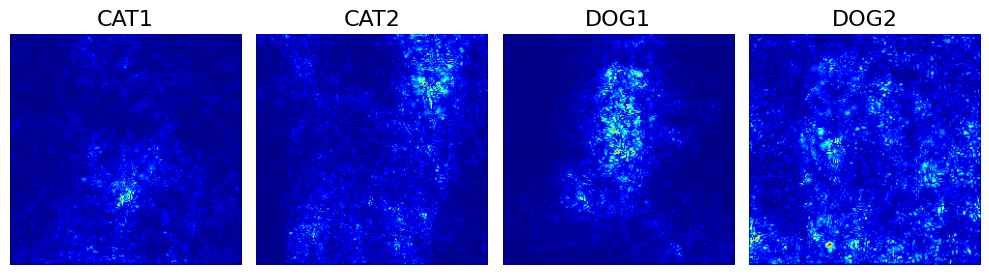

In [ ]:
# Создаем объект Saliency для вычисления карты значимости:
saliency = Saliency(model, model_modifier=replace2linear, clone=True)
# Вычисляем карты значимости для заданных входных данных X с использованием заданного объекта score:
mapList = saliency(score, X)
# Отображаем полученные карты значимости:
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
for i, title in enumerate(imgTitleList):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(mapList[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

## **5. Добавим сглаживания для улучшения наглядности полученных ранее карт знаимости Cайленси:**

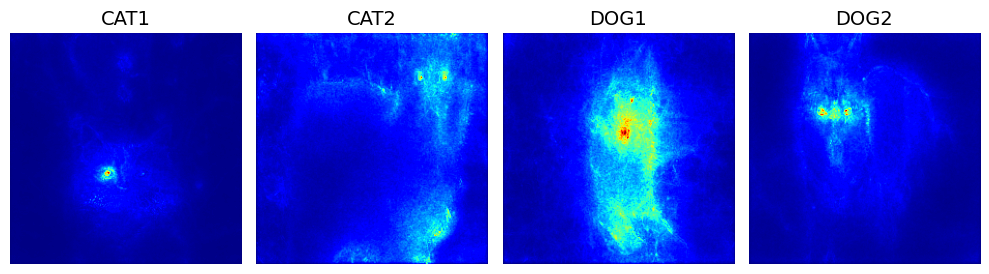

In [ ]:
# Добавляем параметры для реализации сглаживания:
mapList = saliency(score, X, smooth_samples=90, smooth_noise=0.25)
# Отображаем полученные сглаженные карты значимости:
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
for i, title in enumerate(imgTitleList):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(mapList[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

## **6. Используем метод Gradcam для лучшей передачи важности признаков:**

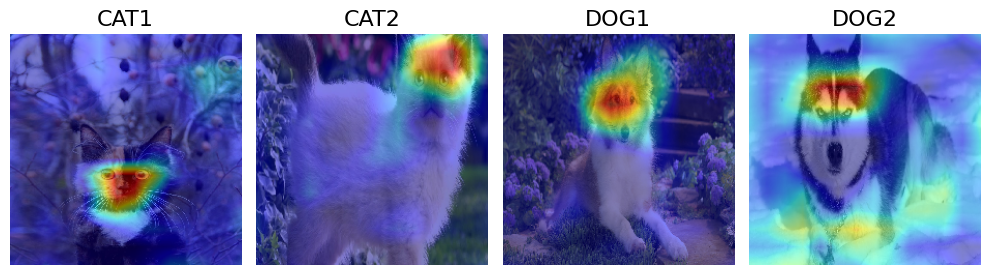

In [ ]:
# Создаем объект Gradcam для вычисления карт по методу Grad-CAM:
gradcam = Gradcam(model, model_modifier=replace2linear, clone=True)
# Вычисляем карты Grad-CAM для заданных входных данных X, указывая предпоследний слой:
mapList = gradcam(score, X, penultimate_layer=-1)
# Визуализируем полученные изображения:
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
for i, title in enumerate(imgTitleList):
    # Преобразуем карту значимости в формат изображения (целочисленный) с использованием цветовой карты 'jet':
    # Применяем цветовую карту и масштабируем значения:
    heatmap = np.uint8(cm.jet(mapList[i])[..., :4] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(imgArr[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

## **7. Используем улучшенный метод Gradcam++:**

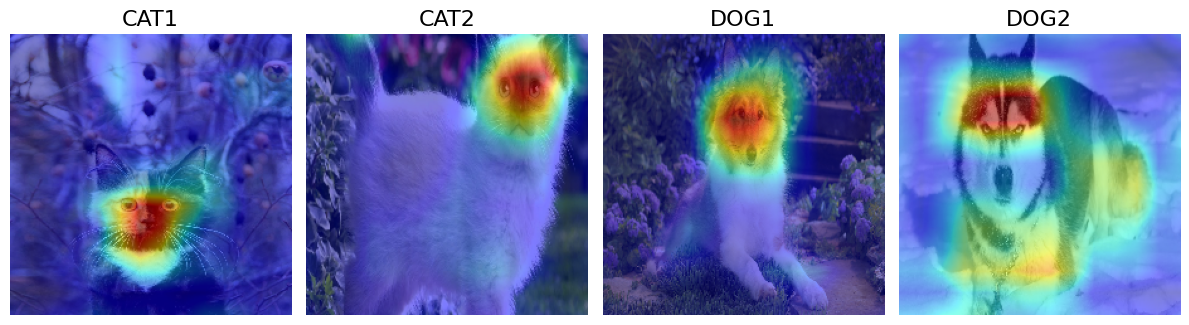

In [ ]:
# Создаем объект GradcamPlusPlus для вычисления карт по методу Grad-CAM++:
gradcam = GradcamPlusPlus(model, model_modifier=replace2linear, clone=True)
# Вычисляем карты GradcamPlusPlus для заданных входных данных X, указывая предпоследний слой:
mapList = gradcam(score, X, penultimate_layer=-1)
# Визуализируем полученные изображения:
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(imgTitleList):
    heatmap = np.uint8(cm.jet(mapList[i])[..., :4] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(imgArr[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

## **8. Выводы:**

В процессе данной работы использовались различные инструменты для более наглядной демонстрации функционирования нейронных сетей и визуализации их работы. Это может способствовать их отладке, так как позволяет проверить, на какие области нейросеть уделяет внимание в процессе обучения.

Были рассмотрены разные методы визуализации, которые помогают понять какие части изображений оказывают наибольшее влияние на процесс принятия решений.